In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data_dir = 'voltmeterdata_Cr.csv'
df = pd.read_csv(data_dir)
df['V(microV)'] = df['V(mV)'] * 1000
df['V uncertainty'] = df['V uncertainty'] * 1000
del df['V(mV)']
df

,Magnet Current (A),B (T),B uncertainty,I(mA),I uncertainty,V uncertainty,Voltmeter range,V(microV)
0,4.50,1.1080,0.003,1,0.1,5.0,1mV,260.0
1,4.50,1.1080,0.003,2,0.1,5.0,1mV,462.0
2,4.50,1.1080,0.003,3,0.1,5.0,1mV,720.0
3,4.50,1.1080,0.003,4,0.1,5.0,1mV,900.0
4,4.50,1.1080,0.003,6,0.1,20.0,3mV,1480.0
5,4.50,1.1080,0.003,7,0.1,20.0,3mV,1690.0
6,4.50,1.1080,0.003,8,0.1,20.0,3mV,1940.0
7,4.50,1.1080,0.003,9,0.1,20.0,3mV,2160.0
8,4.50,1.1080,0.003,10,0.1,20.0,3mV,2250.0
9,4.50,1.1080,0.003,12,0.1,20.0,3mV,2700.0


In [3]:
thickness = 0.00006833597363553966
thickness_pct_uncertainty = 1 / 10
width = 2.33
width_pct_uncertainty = 0.05 / width

df['Jx'] = df['I(mA)'] / (width * thickness) # mA/mm^2
df['dJx'] = df['Jx'] * (
    (df['I uncertainty'] / df['I(mA)']) ** 2 + 
    thickness_pct_uncertainty ** 2 +
    width_pct_uncertainty ** 2
)**0.5

df.head()

,Magnet Current (A),B (T),B uncertainty,I(mA),I uncertainty,V uncertainty,Voltmeter range,V(microV),Jx,dJx
0,4.5,1.108,0.003,1,0.1,5.0,1mV,260.0,6280.506833,898.364945
1,4.5,1.108,0.003,2,0.1,5.0,1mV,462.0,12561.013666,1429.998363
2,4.5,1.108,0.003,3,0.1,5.0,1mV,720.0,18841.520499,2026.809041
3,4.5,1.108,0.003,4,0.1,5.0,1mV,900.0,25122.027332,2645.040319
4,4.5,1.108,0.003,6,0.1,20.0,3mV,1480.0,37683.040998,3904.929778


In [4]:
df['Ey'] = -df['V(microV)'] / width

df['dEy'] = abs(
    df['Ey'] * (
        (df['V uncertainty'] / df['V(microV)']) ** 2 + 
        width_pct_uncertainty ** 2
    )**0.5
)

df.head()

,Magnet Current (A),B (T),B uncertainty,I(mA),I uncertainty,V uncertainty,Voltmeter range,V(microV),Jx,dJx,Ey,dEy
0,4.5,1.108,0.003,1,0.1,5.0,1mV,260.0,6280.506833,898.364945,-111.587983,3.215440
1,4.5,1.108,0.003,2,0.1,5.0,1mV,462.0,12561.013666,1429.998363,-198.283262,4.765507
2,4.5,1.108,0.003,3,0.1,5.0,1mV,720.0,18841.520499,2026.809041,-309.012876,6.969756
3,4.5,1.108,0.003,4,0.1,5.0,1mV,900.0,25122.027332,2645.040319,-386.266094,8.562245
4,4.5,1.108,0.003,6,0.1,20.0,3mV,1480.0,37683.040998,3904.929778,-635.193133,16.108296


In [5]:
from scipy.stats import linregress
from scipy.stats import chi2

def calculate_linreg_features(df_group):
    m, b, r, p, std_err = linregress(df_group['Jx'], df_group['Ey'])
    
    expected = m * df_group['Jx'] + b
    # Calculate components of slope uncertainty
    N = len(df_group['Ey'])
    s_x = N * (df_group['Jx'] ** 2).sum() - df_group['Jx'].sum() ** 2 
    s_yx = (N-2)**-1 * ((df_group['Ey'] - expected) ** 2).sum()

    # Calculate final uncertainties
    s_m = (N * s_yx / s_x) ** 0.5
    s_b = (s_yx * (df_group['Jx'] ** 2).sum() / s_x) ** 0.5
    
    chi = ((expected - df_group['Ey']) ** 2 / df_group['dEy']**2).sum() / N
    p_value = chi2.sf(chi, N-2)
    return pd.Series({
        "Slope": m,
        "Slope Uncertainty": s_m,
        "Intercept": b,
        "Intercept Uncertainty": s_b,
        "Chi Squared Statistic": chi,
        "P Value": p_value
    })

In [6]:
linregs = df.groupby("B (T)").apply(calculate_linreg_features)
linregs

,Slope,Slope Uncertainty,Intercept,Intercept Uncertainty,Chi Squared Statistic,P Value
B (T),,,,,,
0.1091,-0.006613,0.000052,-16.641943,5.562358,0.186226,0.999997
0.3440,-0.011971,0.000194,-67.491731,18.006010,3.689300,0.814787
0.5480,-0.013314,0.000181,-60.786085,18.395001,8.569798,0.379875
0.8320,-0.013055,0.000202,-96.706067,22.082520,0.888051,0.998862
1.1080,-0.013911,0.000176,-81.017471,16.438177,25.520191,0.144122


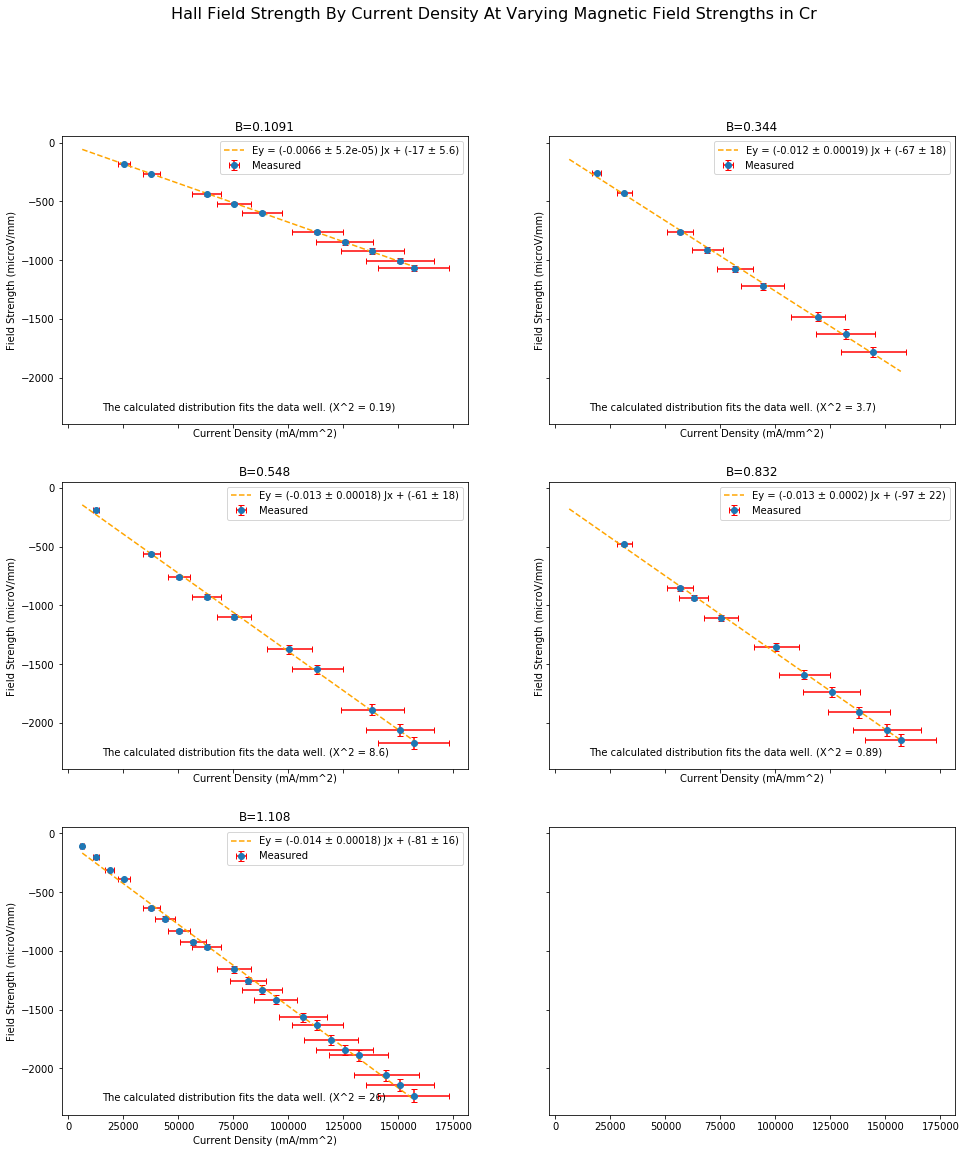

In [7]:
from numpy import linspace
fig, axs = plt.subplots(3,2, sharex=True, sharey=True)
fig.set_size_inches(16, 18)

fig.suptitle('Hall Field Strength By Current Density At Varying Magnetic Field Strengths in Cr', fontsize=16)

for ix, (field_str, data) in enumerate(df.groupby('B (T)')):
    ax = axs[ix//2][ix%2]
    ax.errorbar(
        data['Jx'],
        data['Ey'], 
        xerr=data['dJx'],
        yerr=data['dEy'],
        capsize=3, 
        ecolor='r', 
        linestyle="None", 
        marker='o'
    )
    
    xs = linspace(df['Jx'].min(), df['Jx'].max(), 3)
    m = linregs.loc[field_str]['Slope']
    b = linregs.loc[field_str]['Intercept']
    s_m = linregs.loc[field_str]['Slope Uncertainty']
    s_b = linregs.loc[field_str]['Intercept Uncertainty']
    p =  linregs.loc[field_str]['P Value']
    chi =  linregs.loc[field_str]['Chi Squared Statistic']

    ax.plot(xs, m * xs + b, color='orange', linestyle='--')

    ax.set_xlabel("Current Density (mA/mm^2)")
    ax.set_ylabel("Field Strength (microV/mm)")
    ax.set_title("B={:0.4g}".format(field_str))
    ax.legend(["Ey = ({:0.2g} ± {:0.2g}) Jx + ({:0.2g} ± {:0.2g})".format(m, s_m, b, s_b), "Measured"])
    ax.annotate(
        (f"The calculated distribution does not fit the data. (X^2 = {chi:0.2g})" if p < 0.05 else f"The calculated distribution fits the data well. (X^2 = {chi:0.2g})"),
        (0.1, 0.05), 
        xycoords='axes fraction'
    )

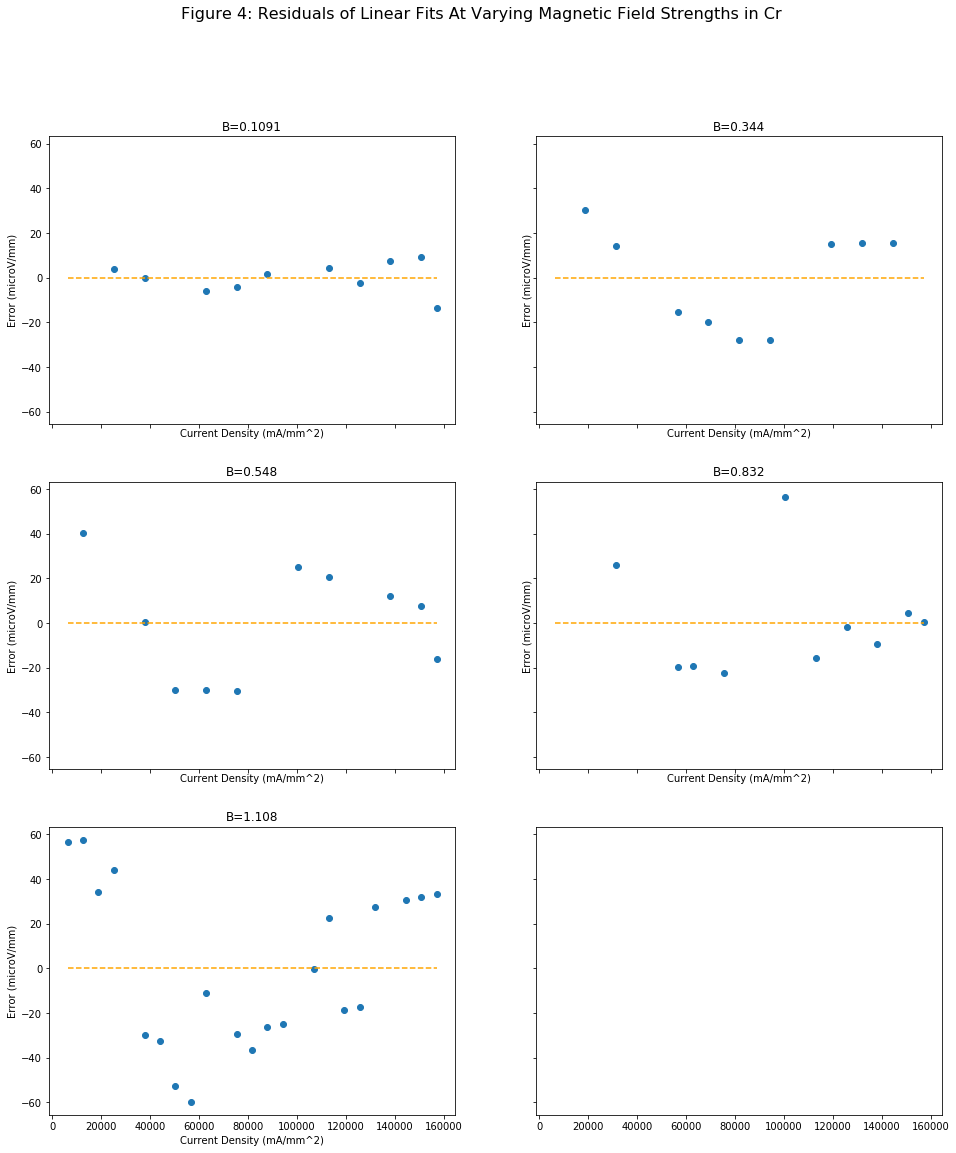

In [8]:
fig, axs = plt.subplots(3,2, sharex=True, sharey=True)
fig.set_size_inches(16, 18)
fig.suptitle('Residuals of Linear Fits At Varying Magnetic Field Strengths in Cr', fontsize=16)

for ix, (field_str, data) in enumerate(df.groupby('B (T)')):
    ax = axs[ix//2][ix%2]
    m = linregs.loc[field_str]['Slope']
    b = linregs.loc[field_str]['Intercept']

    residuals = data['Ey'] - (m * data['Jx'] + b)
    ax.plot(
        data['Jx'], 
        residuals, 
        linestyle='None',
        marker='o'
    )

    ax.set_xlabel("Current Density (mA/mm^2)")
    ax.set_ylabel("Error (microV/mm)")
    ax.set_title("B={:0.4g}".format(field_str))
    ax.plot(
        [df['Jx'].min(), df['Jx'].max()] , 
        [0, 0] , 
        color='orange', 
        linestyle='--'
    )


In [9]:
linregs

,Slope,Slope Uncertainty,Intercept,Intercept Uncertainty,Chi Squared Statistic,P Value
B (T),,,,,,
0.1091,-0.006613,0.000052,-16.641943,5.562358,0.186226,0.999997
0.3440,-0.011971,0.000194,-67.491731,18.006010,3.689300,0.814787
0.5480,-0.013314,0.000181,-60.786085,18.395001,8.569798,0.379875
0.8320,-0.013055,0.000202,-96.706067,22.082520,0.888051,0.998862
1.1080,-0.013911,0.000176,-81.017471,16.438177,25.520191,0.144122


In [10]:
# Ey = (Rh * B) * Jx
# This implies we expect our b to be 0 and Rh = m/B

linregs['Rh'] = linregs['Slope'] / linregs.index # A dirty hack because B (T) is the index of the linear regressions dataframe
linregs['dRh'] = linregs['Rh'] * (
    (linregs['Slope Uncertainty']/linregs['Slope']) ** 2 +
    (0.003 / (linregs.index)) ** 2 # Hardcoded field uncertainty.
) ** 0.5

# The units for Rh are 10^-6 m^3/C
linregs

,Slope,Slope Uncertainty,Intercept,Intercept Uncertainty,Chi Squared Statistic,P Value,Rh,dRh
B (T),,,,,,,,
0.1091,-0.006613,0.000052,-16.641943,5.562358,0.186226,0.999997,-0.060613,-0.001734
0.3440,-0.011971,0.000194,-67.491731,18.006010,3.689300,0.814787,-0.034800,-0.000641
0.5480,-0.013314,0.000181,-60.786085,18.395001,8.569798,0.379875,-0.024295,-0.000356
0.8320,-0.013055,0.000202,-96.706067,22.082520,0.888051,0.998862,-0.015691,-0.000250
1.1080,-0.013911,0.000176,-81.017471,16.438177,25.520191,0.144122,-0.012555,-0.000163


In [11]:
RH = linregs['Rh'].mean()
dRH = sum(linregs['dRh'] ** 2) ** 0.5 / len(linregs['Rh']) 
print("RH = {:0.2g} +- {:0.2g} 10^-6 m^3 / C".format(RH, dRH))

RH = -0.03 +- 0.00038 10^-6 m^3 / C


In [12]:
# Calculate the resistance 
resistances = pd.Series([106.944,106.929,106.951,106.959], name='R')
r = resistances.mean()
dr = resistances.sem()

# Length mm
length = 2.0
length_uncertainty = 0.02

# Area mm^2
area = width * thickness 
area_pct_uncertainty = (thickness_pct_uncertainty ** 2 + width_pct_uncertainty ** 2) ** 0.5

# Resistivty Ohm mm 
rho = r * area / length
drho = (area_pct_uncertainty ** 2 + (length_uncertainty/length) ** 2 + (dr/r) ** 2) ** 0.5 * rho

print("R = {} +- {} ohm".format(r, dr))
print("length = {} +- {} mm".format(length, length_uncertainty))
print("area = {} +- {}% mm^2".format(area, area_pct_uncertainty))
print("rho = {:0.2g} +- {:0.2g} ohm mm".format(rho, drho))

R = 106.94574999999999 +- 0.006368869601428089 ohm
length = 2.0 +- 0.02 mm
area = 0.00015922281857080742 +- 0.10227657817660533% mm^2
rho = 0.0085 +- 0.00087 ohm mm


In [13]:
# n = 1 / (RH e)
e = - 1.6 * 10 ** -19 # Coulombs

n = 1 / (RH * e) * 10 ** -6 # m^-3
dn = abs(dRH/RH * n)
print("n = {:0.2g} +- {:0.2g} m^-3".format(n, dn))

n = 2.1e+14 +- 2.7e+12 m^-3


In [14]:
# mu = RH/rho
mu = RH/rho / 1000 # m^2/(V s)
dmu = ((dRH/RH) ** 2 + (drho/rho) ** 2) ** 0.5 * rho
print("mu = {:0.2g} +- {:0.2g} m^2/(Vs)".format(mu, dmu))

mu = -0.0035 +- 0.00088 m^2/(Vs)
